<a href="https://colab.research.google.com/github/MengxuanMa2016/Credit-Card-Fraud-Detection/blob/master/Credit_Card_Fraud_Detection_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [0]:
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(100)

## Load the credit card dataset
link to the dataset: https://data.world/vlad/credit-card-fraud-detection

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
# list data files are available in the data directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

path = "/content/gdrive/My Drive/credit_card_fraud_detection/"

from subprocess import check_output
print(check_output(["ls", path]).decode("utf8"))

# Any results you write to the current directory are saved as output.

CC.csv
Credit_Card_Fraud_Detection-Exploratory_Data_Analysis.ipynb



## Display the transaction table

In [25]:
transactions = pd.read_csv(path + "CC.csv")

# Time Feature is number of seconds elapsed between this transaction and the first transaction in the dataset
# Normalized the tiem feature by days
transactions["Time"] = transactions["Time"].apply(lambda x : x / 3600 % 24)
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset consists of 28 anonymized features, "Amount" feature, and "Time" feature. Each row represents a transaction with "Class" label. 1 for fraudulent transactions, 0 otherwise. 

## Proportion of fraudulent transactions

In [26]:
class_proportion = transactions['Class'].value_counts().to_frame().reset_index()
class_proportion['Percent'] = class_proportion["Class"].apply(lambda x : round(100*float(x) / len(transactions), 3))
class_proportion = class_proportion.rename(columns = {"index" : "Class", "Class" : "Count"})
class_proportion

,Class,Count,Percent
0,0,284315,99.827
1,1,492,0.173


Based on the percentage table above, only 0.17 percentage of transactions are fraudulent transactions. The data is **highly imbalanced**. 

## Plot 1: Visualization of fraud and non-fraud transactions

Decomposition technique T-SNE (t-Distributed Stochastic Neighbor Embedding) is applied to reduce the dimentions of data and produces only top 2 components with maximum information.  

In [0]:
non_fraud = transactions[transactions['Class'] == 0].sample(10000)
fraud = transactions[transactions['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
features = df.drop(['Class'], axis = 1).values
labels = df["Class"].values

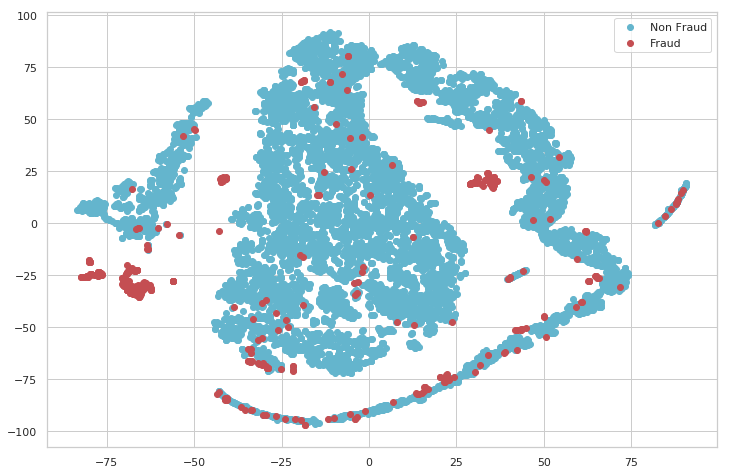

In [21]:
def tsne_plot(X, Y):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(X)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(Y == 0), 0], X_t[np.where(Y == 0), 1], marker='o', color='c', label='Non Fraud')
    plt.scatter(X_t[np.where(Y == 1), 0], X_t[np.where(Y == 1), 1], marker='o', color='r', label='Fraud')

    plt.legend(loc='best')
    plt.show()
    
tsne_plot(features, labels)

Every dot in the figure above represents a transaction. Non Fraud transactions are represented as Green while Fraud transactions are represented as Red. The two axis are the components extracted by tsne. 

We can observe from the figure that many non-fraud transactions are very close to fraud transactions. **There is no obvious boundary between fraud and non-fraud class.**